In [1]:
'''
train
- support
    - base class 7

val
- support
    - novel class 4
- query
    - base class with no label
    - novel class with no label

test
- support
    - novel class 4
- query
    - base class with no label
    - novel class with no label
'''

'\ntrain\n- support\n    - base class 7\n\nval\n- support\n    - novel class 4\n- query\n    - base class with no label\n    - novel class with no label\n\ntest\n- support\n    - novel class 4\n- query\n    - base class with no label\n    - novel class with no label\n'

In [2]:
'''
1. **The `trainset`:
     classId2className = {
                          # ***Base classes***
                          1: 'tree',
                          2: 'rangeland',
                          3: 'bareland',
                          4: 'agric land type 1',
                          5: 'road type 1',
                          6: 'sea, lake, & pond',
                          7: 'building type 1'
                        }

2. **The `valset` and `testset`:
     classId2className = {
                          # ***Base classes***
                          1: 'tree',
                          2: 'rangeland',
                          3: 'bareland',
                          4: 'agric land type 1',
                          5: 'road type 1',
                          6: 'sea, lake, & pond',
                          7: 'building type 1'
                          # ***Novel classes***
                          8: '',
                          9: '',
                          10: '',
                          11: ''
                        }

      - The class names for the ***Novel classes*** depends on the data set.

        For the `valset`, the class names can be updated as:
                        {
                          8: 'road type 2',
                          9: 'river',
                          10: 'boat & ship',
                          11: 'agric land type 2'
                        }

        For the `testset`, the class names can be updated as:
                        {
                          8: 'vehicle & cargo-trailer',
                          9: 'parking space',
                          10: 'sports field',
                          11: 'building type 2'
                        }
'''

"\n1. **The `trainset`:\n     classId2className = {\n                          # ***Base classes***\n                          1: 'tree',\n                          2: 'rangeland',\n                          3: 'bareland',\n                          4: 'agric land type 1',\n                          5: 'road type 1',\n                          6: 'sea, lake, & pond',\n                          7: 'building type 1'\n                        }\n\n2. **The `valset` and `testset`:\n     classId2className = {\n                          # ***Base classes***\n                          1: 'tree',\n                          2: 'rangeland',\n                          3: 'bareland',\n                          4: 'agric land type 1',\n                          5: 'road type 1',\n                          6: 'sea, lake, & pond',\n                          7: 'building type 1'\n                          # ***Novel classes***\n                          8: '',\n                          9: '',\n       

In [3]:
import sys 
sys.path.append("/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/OEM-Few-Shot-Learnable-Prompt")

In [4]:
import json
import torch
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
from data import OEMDataset

In [9]:
config_ = "/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/OEM-Few-Shot-Learnable-Prompt/configs/base.json"
train_args =  json.load(open(config_, 'r'))

In [10]:
train_args

{'lr': 0.0001,
 'cycle_mult': 1.2,
 'lr_decay_factor': 0.5,
 'cycle_steps': 5000,
 'warmup_steps': 500,
 'min_lr': 1e-08,
 'batch_size': 2,
 'epoch': 1,
 'log_dir': 'logs',
 'train_dataset_dir': '/home/eric/data/trainset',
 'val_dataset_dir': '/home/eric/data/valset',
 'mask_ratio': 0.7,
 'num_workers': 32,
 'eval_per_epoch': 1,
 'ckpt_interval': 3,
 'image_mean': [0.485, 0.456, 0.406],
 'image_std': [0.229, 0.224, 0.225],
 'image_log_interval': 50,
 'n_classes': 8}

In [11]:
train_dataset = OEMDataset(
    root = train_args['train_dataset_dir'], 
    max_classes = train_args['n_classes'],
    mean = train_args['image_mean'],
    std = train_args['image_std'],
    mask_ratio = train_args['mask_ratio'],
    resize = (1024, 1024),
    is_train=True,
)

Caching images and labels:   2%|▏         | 4/258 [00:00<00:06, 39.98it/s]

filename /home/eric/data/trainset/images/viru_27.tif
filename /home/eric/data/trainset/labels/viru_27.tif
filename /home/eric/data/trainset/images/christchurch_23.tif
filename /home/eric/data/trainset/labels/christchurch_23.tif
filename /home/eric/data/trainset/images/daressalaam_51.tif
filename /home/eric/data/trainset/labels/daressalaam_51.tif
filename /home/eric/data/trainset/images/baybay_17.tif
filename /home/eric/data/trainset/labels/baybay_17.tif
filename /home/eric/data/trainset/images/kyoto_8.tif
filename /home/eric/data/trainset/labels/kyoto_8.tif
filename /home/eric/data/trainset/images/melbourne_51.tif
filename /home/eric/data/trainset/labels/melbourne_51.tif
filename /home/eric/data/trainset/images/melbourne_24.tif
filename /home/eric/data/trainset/labels/melbourne_24.tif
filename /home/eric/data/trainset/images/al_qurnah_63.tif
filename /home/eric/data/trainset/labels/al_qurnah_63.tif
filename /home/eric/data/trainset/images/austin_2.tif
filename /home/eric/data/trainset/

Caching images and labels:   5%|▌         | 14/258 [00:00<00:05, 46.15it/s]

filename /home/eric/data/trainset/images/pomorskie_28.tif
filename /home/eric/data/trainset/labels/pomorskie_28.tif
filename /home/eric/data/trainset/images/bielefeld_5.tif
filename /home/eric/data/trainset/labels/bielefeld_5.tif
filename /home/eric/data/trainset/images/wielkopolskie_21.tif
filename /home/eric/data/trainset/labels/wielkopolskie_21.tif
filename /home/eric/data/trainset/images/kagera_58.tif
filename /home/eric/data/trainset/labels/kagera_58.tif
filename /home/eric/data/trainset/images/chiclayo_40.tif
filename /home/eric/data/trainset/labels/chiclayo_40.tif
filename /home/eric/data/trainset/images/chiangmai_13.tif
filename /home/eric/data/trainset/labels/chiangmai_13.tif
filename /home/eric/data/trainset/images/austin_38.tif
filename /home/eric/data/trainset/labels/austin_38.tif
filename /home/eric/data/trainset/images/monrovia_25.tif
filename /home/eric/data/trainset/labels/monrovia_25.tif
filename /home/eric/data/trainset/images/koeln_10.tif
filename /home/eric/data/tra

Caching images and labels:   9%|▉         | 24/258 [00:00<00:05, 43.33it/s]

filename /home/eric/data/trainset/images/pomorskie_1.tif
filename /home/eric/data/trainset/labels/pomorskie_1.tif
filename /home/eric/data/trainset/images/baybay_5.tif
filename /home/eric/data/trainset/labels/baybay_5.tif
filename /home/eric/data/trainset/images/chincha_1.tif
filename /home/eric/data/trainset/labels/chincha_1.tif
filename /home/eric/data/trainset/images/austin_44.tif
filename /home/eric/data/trainset/labels/austin_44.tif
filename /home/eric/data/trainset/images/dortmund_44.tif
filename /home/eric/data/trainset/labels/dortmund_44.tif
filename /home/eric/data/trainset/images/svaneti_20.tif
filename /home/eric/data/trainset/labels/svaneti_20.tif
filename /home/eric/data/trainset/images/zanzibar_10.tif
filename /home/eric/data/trainset/labels/zanzibar_10.tif
filename /home/eric/data/trainset/images/buenos_aires_26.tif
filename /home/eric/data/trainset/labels/buenos_aires_26.tif
filename /home/eric/data/trainset/images/kyoto_55.tif
filename /home/eric/data/trainset/labels/k

Caching images and labels:  13%|█▎        | 34/258 [00:00<00:04, 45.19it/s]

filename /home/eric/data/trainset/labels/piura_8.tif
filename /home/eric/data/trainset/images/dortmund_65.tif
filename /home/eric/data/trainset/labels/dortmund_65.tif
filename /home/eric/data/trainset/images/viru_19.tif
filename /home/eric/data/trainset/labels/viru_19.tif
filename /home/eric/data/trainset/images/western_25.tif
filename /home/eric/data/trainset/labels/western_25.tif
filename /home/eric/data/trainset/images/baybay_3.tif
filename /home/eric/data/trainset/labels/baybay_3.tif
filename /home/eric/data/trainset/images/muenster_51.tif
filename /home/eric/data/trainset/labels/muenster_51.tif
filename /home/eric/data/trainset/images/melbourne_11.tif
filename /home/eric/data/trainset/labels/melbourne_11.tif
filename /home/eric/data/trainset/images/accra_27.tif
filename /home/eric/data/trainset/labels/accra_27.tif
filename /home/eric/data/trainset/images/ngaoundere_20.tif
filename /home/eric/data/trainset/labels/ngaoundere_20.tif
filename /home/eric/data/trainset/images/ulaanbaata

Caching images and labels:  17%|█▋        | 45/258 [00:00<00:04, 45.61it/s]

filename /home/eric/data/trainset/images/viru_15.tif
filename /home/eric/data/trainset/labels/viru_15.tif
filename /home/eric/data/trainset/images/malopolskie_12.tif
filename /home/eric/data/trainset/labels/malopolskie_12.tif
filename /home/eric/data/trainset/images/malopolskie_7.tif
filename /home/eric/data/trainset/labels/malopolskie_7.tif
filename /home/eric/data/trainset/images/muenster_28.tif
filename /home/eric/data/trainset/labels/muenster_28.tif
filename /home/eric/data/trainset/images/daressalaam_64.tif
filename /home/eric/data/trainset/labels/daressalaam_64.tif
filename /home/eric/data/trainset/images/zachodniopomorskie_11.tif
filename /home/eric/data/trainset/labels/zachodniopomorskie_11.tif
filename /home/eric/data/trainset/images/kagera_52.tif
filename /home/eric/data/trainset/labels/kagera_52.tif
filename /home/eric/data/trainset/images/tyrolw_53.tif
filename /home/eric/data/trainset/labels/tyrolw_53.tif
filename /home/eric/data/trainset/images/chicago_1.tif
filename /hom

Caching images and labels:  19%|█▉        | 50/258 [00:01<00:05, 41.46it/s]

filename /home/eric/data/trainset/images/pointenoire_10.tif
filename /home/eric/data/trainset/labels/pointenoire_10.tif
filename /home/eric/data/trainset/images/paris_36.tif
filename /home/eric/data/trainset/labels/paris_36.tif
filename /home/eric/data/trainset/images/tyrolw_63.tif
filename /home/eric/data/trainset/labels/tyrolw_63.tif
filename /home/eric/data/trainset/images/koeln_32.tif
filename /home/eric/data/trainset/labels/koeln_32.tif
filename /home/eric/data/trainset/images/tokyo_14.tif
filename /home/eric/data/trainset/labels/tokyo_14.tif
filename /home/eric/data/trainset/images/bielefeld_1.tif
filename /home/eric/data/trainset/labels/bielefeld_1.tif
filename /home/eric/data/trainset/images/christchurch_42.tif
filename /home/eric/data/trainset/labels/christchurch_42.tif
filename /home/eric/data/trainset/images/mahe_51.tif
filename /home/eric/data/trainset/labels/mahe_51.tif


Caching images and labels:  24%|██▎       | 61/258 [00:01<00:04, 45.75it/s]

filename /home/eric/data/trainset/images/lambayeque_46.tif
filename /home/eric/data/trainset/labels/lambayeque_46.tif
filename /home/eric/data/trainset/images/lodzkie_5.tif
filename /home/eric/data/trainset/labels/lodzkie_5.tif
filename /home/eric/data/trainset/images/san_tome_25.tif
filename /home/eric/data/trainset/labels/san_tome_25.tif
filename /home/eric/data/trainset/images/chincha_12.tif
filename /home/eric/data/trainset/labels/chincha_12.tif
filename /home/eric/data/trainset/images/sechura_25.tif
filename /home/eric/data/trainset/labels/sechura_25.tif
filename /home/eric/data/trainset/images/daressalaam_77.tif
filename /home/eric/data/trainset/labels/daressalaam_77.tif
filename /home/eric/data/trainset/images/slaskie_4.tif
filename /home/eric/data/trainset/labels/slaskie_4.tif
filename /home/eric/data/trainset/images/tokyo_65.tif
filename /home/eric/data/trainset/labels/tokyo_65.tif
filename /home/eric/data/trainset/images/austin_36.tif
filename /home/eric/data/trainset/labels/

Caching images and labels:  28%|██▊       | 71/258 [00:01<00:04, 43.66it/s]

filename /home/eric/data/trainset/images/maputo_10.tif
filename /home/eric/data/trainset/labels/maputo_10.tif
filename /home/eric/data/trainset/images/khartoum_46.tif
filename /home/eric/data/trainset/labels/khartoum_46.tif
filename /home/eric/data/trainset/images/podkarpackie_19.tif
filename /home/eric/data/trainset/labels/podkarpackie_19.tif
filename /home/eric/data/trainset/images/dortmund_7.tif
filename /home/eric/data/trainset/labels/dortmund_7.tif
filename /home/eric/data/trainset/images/piura_46.tif
filename /home/eric/data/trainset/labels/piura_46.tif
filename /home/eric/data/trainset/images/bogota_7.tif
filename /home/eric/data/trainset/labels/bogota_7.tif
filename /home/eric/data/trainset/images/dhaka_28.tif
filename /home/eric/data/trainset/labels/dhaka_28.tif
filename /home/eric/data/trainset/images/lodzkie_18.tif
filename /home/eric/data/trainset/labels/lodzkie_18.tif
filename /home/eric/data/trainset/images/chicago_16.tif
filename /home/eric/data/trainset/labels/chicago_1

Caching images and labels:  31%|███▏      | 81/258 [00:01<00:04, 43.68it/s]

filename /home/eric/data/trainset/images/kyoto_47.tif
filename /home/eric/data/trainset/labels/kyoto_47.tif
filename /home/eric/data/trainset/images/ulaanbaatar_1.tif
filename /home/eric/data/trainset/labels/ulaanbaatar_1.tif
filename /home/eric/data/trainset/images/dortmund_34.tif
filename /home/eric/data/trainset/labels/dortmund_34.tif
filename /home/eric/data/trainset/images/paris_58.tif
filename /home/eric/data/trainset/labels/paris_58.tif
filename /home/eric/data/trainset/images/chicago_15.tif
filename /home/eric/data/trainset/labels/chicago_15.tif
filename /home/eric/data/trainset/images/slaskie_34.tif
filename /home/eric/data/trainset/labels/slaskie_34.tif
filename /home/eric/data/trainset/images/podkarpackie_11.tif
filename /home/eric/data/trainset/labels/podkarpackie_11.tif
filename /home/eric/data/trainset/images/lambayeque_5.tif
filename /home/eric/data/trainset/labels/lambayeque_5.tif
filename /home/eric/data/trainset/images/western_4.tif
filename /home/eric/data/trainset/l

Caching images and labels:  34%|███▎      | 87/258 [00:01<00:03, 46.33it/s]

filename /home/eric/data/trainset/images/monrovia_21.tif
filename /home/eric/data/trainset/labels/monrovia_21.tif
filename /home/eric/data/trainset/images/daressalaam_12.tif
filename /home/eric/data/trainset/labels/daressalaam_12.tif
filename /home/eric/data/trainset/images/pointenoire_3.tif
filename /home/eric/data/trainset/labels/pointenoire_3.tif
filename /home/eric/data/trainset/images/mahe_54.tif
filename /home/eric/data/trainset/labels/mahe_54.tif
filename /home/eric/data/trainset/images/svaneti_51.tif
filename /home/eric/data/trainset/labels/svaneti_51.tif
filename /home/eric/data/trainset/images/lodzkie_8.tif
filename /home/eric/data/trainset/labels/lodzkie_8.tif
filename /home/eric/data/trainset/images/tyrolw_64.tif
filename /home/eric/data/trainset/labels/tyrolw_64.tif
filename /home/eric/data/trainset/images/dhaka_65.tif
filename /home/eric/data/trainset/labels/dhaka_65.tif
filename /home/eric/data/trainset/images/kampala_4.tif
filename /home/eric/data/trainset/labels/kampal

Caching images and labels:  38%|███▊      | 97/258 [00:02<00:03, 42.89it/s]

filename /home/eric/data/trainset/labels/kitsap_12.tif
filename /home/eric/data/trainset/images/tyrolw_11.tif
filename /home/eric/data/trainset/labels/tyrolw_11.tif
filename /home/eric/data/trainset/images/duesseldorf_5.tif
filename /home/eric/data/trainset/labels/duesseldorf_5.tif
filename /home/eric/data/trainset/images/slaskie_33.tif
filename /home/eric/data/trainset/labels/slaskie_33.tif
filename /home/eric/data/trainset/images/mahe_58.tif
filename /home/eric/data/trainset/labels/mahe_58.tif
filename /home/eric/data/trainset/images/melbourne_67.tif
filename /home/eric/data/trainset/labels/melbourne_67.tif
filename /home/eric/data/trainset/images/kyoto_13.tif
filename /home/eric/data/trainset/labels/kyoto_13.tif
filename /home/eric/data/trainset/images/san_tome_9.tif
filename /home/eric/data/trainset/labels/san_tome_9.tif
filename /home/eric/data/trainset/images/chincha_35.tif
filename /home/eric/data/trainset/labels/chincha_35.tif
filename /home/eric/data/trainset/images/podlaskie_

Caching images and labels:  42%|████▏     | 108/258 [00:02<00:03, 44.96it/s]

filename /home/eric/data/trainset/labels/podlaskie_7.tif
filename /home/eric/data/trainset/images/coxsbazar_80.tif
filename /home/eric/data/trainset/labels/coxsbazar_80.tif
filename /home/eric/data/trainset/images/kitsap_30.tif
filename /home/eric/data/trainset/labels/kitsap_30.tif
filename /home/eric/data/trainset/images/lohur_20.tif
filename /home/eric/data/trainset/labels/lohur_20.tif
filename /home/eric/data/trainset/images/vienna_9.tif
filename /home/eric/data/trainset/labels/vienna_9.tif
filename /home/eric/data/trainset/images/lambayeque_41.tif
filename /home/eric/data/trainset/labels/lambayeque_41.tif
filename /home/eric/data/trainset/images/melbourne_12.tif
filename /home/eric/data/trainset/labels/melbourne_12.tif
filename /home/eric/data/trainset/images/podlaskie_10.tif
filename /home/eric/data/trainset/labels/podlaskie_10.tif
filename /home/eric/data/trainset/images/chicago_29.tif
filename /home/eric/data/trainset/labels/chicago_29.tif


Caching images and labels:  44%|████▍     | 113/258 [00:02<00:03, 42.93it/s]

filename /home/eric/data/trainset/images/mahe_5.tif
filename /home/eric/data/trainset/labels/mahe_5.tif
filename /home/eric/data/trainset/images/vienna_37.tif
filename /home/eric/data/trainset/labels/vienna_37.tif
filename /home/eric/data/trainset/images/lima_2.tif
filename /home/eric/data/trainset/labels/lima_2.tif
filename /home/eric/data/trainset/images/shanghai_64.tif
filename /home/eric/data/trainset/labels/shanghai_64.tif
filename /home/eric/data/trainset/images/baybay_15.tif
filename /home/eric/data/trainset/labels/baybay_15.tif
filename /home/eric/data/trainset/images/rio_43.tif
filename /home/eric/data/trainset/labels/rio_43.tif
filename /home/eric/data/trainset/images/piura_1.tif
filename /home/eric/data/trainset/labels/piura_1.tif
filename /home/eric/data/trainset/images/dortmund_42.tif
filename /home/eric/data/trainset/labels/dortmund_42.tif
filename /home/eric/data/trainset/images/tokyo_1.tif
filename /home/eric/data/trainset/labels/tokyo_1.tif


Caching images and labels:  48%|████▊     | 123/258 [00:02<00:03, 44.88it/s]

filename /home/eric/data/trainset/images/lima_36.tif
filename /home/eric/data/trainset/labels/lima_36.tif
filename /home/eric/data/trainset/images/dolnoslaskie_32.tif
filename /home/eric/data/trainset/labels/dolnoslaskie_32.tif
filename /home/eric/data/trainset/images/malopolskie_8.tif
filename /home/eric/data/trainset/labels/malopolskie_8.tif
filename /home/eric/data/trainset/images/chicago_47.tif
filename /home/eric/data/trainset/labels/chicago_47.tif
filename /home/eric/data/trainset/images/santiago_32.tif
filename /home/eric/data/trainset/labels/santiago_32.tif
filename /home/eric/data/trainset/images/kyoto_30.tif
filename /home/eric/data/trainset/labels/kyoto_30.tif
filename /home/eric/data/trainset/images/san_tome_5.tif
filename /home/eric/data/trainset/labels/san_tome_5.tif
filename /home/eric/data/trainset/images/mazowieckie_9.tif
filename /home/eric/data/trainset/labels/mazowieckie_9.tif
filename /home/eric/data/trainset/images/swietokrzyskie_34.tif
filename /home/eric/data/tr

Caching images and labels:  52%|█████▏    | 134/258 [00:03<00:02, 46.53it/s]

filename /home/eric/data/trainset/labels/dortmund_49.tif
filename /home/eric/data/trainset/images/maputo_8.tif
filename /home/eric/data/trainset/labels/maputo_8.tif
filename /home/eric/data/trainset/images/baybay_23.tif
filename /home/eric/data/trainset/labels/baybay_23.tif
filename /home/eric/data/trainset/images/chicago_35.tif
filename /home/eric/data/trainset/labels/chicago_35.tif
filename /home/eric/data/trainset/images/zanzibar_8.tif
filename /home/eric/data/trainset/labels/zanzibar_8.tif
filename /home/eric/data/trainset/images/rosario_3.tif
filename /home/eric/data/trainset/labels/rosario_3.tif
filename /home/eric/data/trainset/images/piura_24.tif
filename /home/eric/data/trainset/labels/piura_24.tif
filename /home/eric/data/trainset/images/chisinau_58.tif
filename /home/eric/data/trainset/labels/chisinau_58.tif
filename /home/eric/data/trainset/images/kujawsko-pomorskie_22.tif
filename /home/eric/data/trainset/labels/kujawsko-pomorskie_22.tif
filename /home/eric/data/trainset/i

Caching images and labels:  56%|█████▌    | 145/258 [00:03<00:02, 46.04it/s]

filename /home/eric/data/trainset/images/svaneti_17.tif
filename /home/eric/data/trainset/labels/svaneti_17.tif
filename /home/eric/data/trainset/images/khartoum_70.tif
filename /home/eric/data/trainset/labels/khartoum_70.tif
filename /home/eric/data/trainset/images/abancay_26.tif
filename /home/eric/data/trainset/labels/abancay_26.tif
filename /home/eric/data/trainset/images/paris_57.tif
filename /home/eric/data/trainset/labels/paris_57.tif
filename /home/eric/data/trainset/images/swietokrzyskie_9.tif
filename /home/eric/data/trainset/labels/swietokrzyskie_9.tif
filename /home/eric/data/trainset/images/aachen_20.tif
filename /home/eric/data/trainset/labels/aachen_20.tif
filename /home/eric/data/trainset/images/kinshasa_4.tif
filename /home/eric/data/trainset/labels/kinshasa_4.tif
filename /home/eric/data/trainset/images/paris_68.tif
filename /home/eric/data/trainset/labels/paris_68.tif
filename /home/eric/data/trainset/images/ngaoundere_58.tif
filename /home/eric/data/trainset/labels/

Caching images and labels:  60%|██████    | 155/258 [00:03<00:02, 41.60it/s]

filename /home/eric/data/trainset/images/accra_37.tif
filename /home/eric/data/trainset/labels/accra_37.tif
filename /home/eric/data/trainset/images/tokyo_32.tif
filename /home/eric/data/trainset/labels/tokyo_32.tif
filename /home/eric/data/trainset/images/dortmund_33.tif
filename /home/eric/data/trainset/labels/dortmund_33.tif
filename /home/eric/data/trainset/images/vienna_55.tif
filename /home/eric/data/trainset/labels/vienna_55.tif
filename /home/eric/data/trainset/images/tyrolw_9.tif
filename /home/eric/data/trainset/labels/tyrolw_9.tif
filename /home/eric/data/trainset/images/buenos_aires_17.tif
filename /home/eric/data/trainset/labels/buenos_aires_17.tif
filename /home/eric/data/trainset/images/duesseldorf_66.tif
filename /home/eric/data/trainset/labels/duesseldorf_66.tif
filename /home/eric/data/trainset/images/austin_15.tif


Caching images and labels:  62%|██████▏   | 160/258 [00:03<00:02, 41.40it/s]

filename /home/eric/data/trainset/labels/austin_15.tif
filename /home/eric/data/trainset/images/ica_5.tif
filename /home/eric/data/trainset/labels/ica_5.tif
filename /home/eric/data/trainset/images/mahe_19.tif
filename /home/eric/data/trainset/labels/mahe_19.tif
filename /home/eric/data/trainset/images/koeln_13.tif
filename /home/eric/data/trainset/labels/koeln_13.tif
filename /home/eric/data/trainset/images/swietokrzyskie_12.tif
filename /home/eric/data/trainset/labels/swietokrzyskie_12.tif
filename /home/eric/data/trainset/images/daressalaam_30.tif
filename /home/eric/data/trainset/labels/daressalaam_30.tif
filename /home/eric/data/trainset/images/duesseldorf_31.tif
filename /home/eric/data/trainset/labels/duesseldorf_31.tif
filename /home/eric/data/trainset/images/vienna_3.tif
filename /home/eric/data/trainset/labels/vienna_3.tif
filename /home/eric/data/trainset/images/malopolskie_39.tif
filename /home/eric/data/trainset/labels/malopolskie_39.tif
filename /home/eric/data/trainset/i

Caching images and labels:  66%|██████▌   | 170/258 [00:03<00:02, 41.00it/s]

filename /home/eric/data/trainset/labels/vegas_33.tif
filename /home/eric/data/trainset/images/ica_41.tif
filename /home/eric/data/trainset/labels/ica_41.tif
filename /home/eric/data/trainset/images/dhaka_64.tif
filename /home/eric/data/trainset/labels/dhaka_64.tif
filename /home/eric/data/trainset/images/vegas_8.tif
filename /home/eric/data/trainset/labels/vegas_8.tif
filename /home/eric/data/trainset/images/koeln_21.tif
filename /home/eric/data/trainset/labels/koeln_21.tif
filename /home/eric/data/trainset/images/san_tome_45.tif
filename /home/eric/data/trainset/labels/san_tome_45.tif
filename /home/eric/data/trainset/images/coxsbazar_70.tif
filename /home/eric/data/trainset/labels/coxsbazar_70.tif
filename /home/eric/data/trainset/images/swietokrzyskie_29.tif
filename /home/eric/data/trainset/labels/swietokrzyskie_29.tif
filename /home/eric/data/trainset/images/svaneti_61.tif
filename /home/eric/data/trainset/labels/svaneti_61.tif
filename /home/eric/data/trainset/images/maputo_12.t

Caching images and labels:  70%|███████   | 181/258 [00:04<00:01, 43.28it/s]

filename /home/eric/data/trainset/images/chiangmai_7.tif
filename /home/eric/data/trainset/labels/chiangmai_7.tif
filename /home/eric/data/trainset/images/kujawsko-pomorskie_7.tif
filename /home/eric/data/trainset/labels/kujawsko-pomorskie_7.tif
filename /home/eric/data/trainset/images/chiangmai_20.tif
filename /home/eric/data/trainset/labels/chiangmai_20.tif
filename /home/eric/data/trainset/images/christchurch_17.tif
filename /home/eric/data/trainset/labels/christchurch_17.tif
filename /home/eric/data/trainset/images/svaneti_38.tif
filename /home/eric/data/trainset/labels/svaneti_38.tif
filename /home/eric/data/trainset/images/bielefeld_2.tif
filename /home/eric/data/trainset/labels/bielefeld_2.tif
filename /home/eric/data/trainset/images/kitsap_13.tif
filename /home/eric/data/trainset/labels/kitsap_13.tif
filename /home/eric/data/trainset/images/paris_56.tif
filename /home/eric/data/trainset/labels/paris_56.tif
filename /home/eric/data/trainset/images/san_tome_28.tif
filename /home/

Caching images and labels:  74%|███████▍  | 192/258 [00:04<00:01, 47.42it/s]

filename /home/eric/data/trainset/images/tokyo_11.tif
filename /home/eric/data/trainset/labels/tokyo_11.tif
filename /home/eric/data/trainset/images/kagera_14.tif
filename /home/eric/data/trainset/labels/kagera_14.tif
filename /home/eric/data/trainset/images/santiago_63.tif
filename /home/eric/data/trainset/labels/santiago_63.tif
filename /home/eric/data/trainset/images/malopolskie_13.tif
filename /home/eric/data/trainset/labels/malopolskie_13.tif
filename /home/eric/data/trainset/images/pisco_30.tif
filename /home/eric/data/trainset/labels/pisco_30.tif
filename /home/eric/data/trainset/images/svaneti_8.tif
filename /home/eric/data/trainset/labels/svaneti_8.tif
filename /home/eric/data/trainset/images/piura_7.tif
filename /home/eric/data/trainset/labels/piura_7.tif
filename /home/eric/data/trainset/images/wielkopolskie_31.tif
filename /home/eric/data/trainset/labels/wielkopolskie_31.tif
filename /home/eric/data/trainset/images/maputo_16.tif
filename /home/eric/data/trainset/labels/mapu

Caching images and labels:  79%|███████▊  | 203/258 [00:04<00:01, 47.40it/s]

filename /home/eric/data/trainset/labels/duesseldorf_52.tif
filename /home/eric/data/trainset/images/lambayeque_22.tif
filename /home/eric/data/trainset/labels/lambayeque_22.tif
filename /home/eric/data/trainset/images/muenster_65.tif
filename /home/eric/data/trainset/labels/muenster_65.tif
filename /home/eric/data/trainset/images/lubuskie_16.tif
filename /home/eric/data/trainset/labels/lubuskie_16.tif
filename /home/eric/data/trainset/images/baybay_49.tif
filename /home/eric/data/trainset/labels/baybay_49.tif
filename /home/eric/data/trainset/images/kujawsko-pomorskie_18.tif
filename /home/eric/data/trainset/labels/kujawsko-pomorskie_18.tif
filename /home/eric/data/trainset/images/rio_52.tif
filename /home/eric/data/trainset/labels/rio_52.tif
filename /home/eric/data/trainset/images/ica_13.tif
filename /home/eric/data/trainset/labels/ica_13.tif
filename /home/eric/data/trainset/images/soriano_17.tif
filename /home/eric/data/trainset/labels/soriano_17.tif
filename /home/eric/data/train

Caching images and labels:  81%|████████  | 208/258 [00:04<00:01, 45.81it/s]

filename /home/eric/data/trainset/labels/chiclayo_47.tif
filename /home/eric/data/trainset/images/lodzkie_21.tif
filename /home/eric/data/trainset/labels/lodzkie_21.tif
filename /home/eric/data/trainset/images/chiclayo_26.tif
filename /home/eric/data/trainset/labels/chiclayo_26.tif
filename /home/eric/data/trainset/images/vegas_2.tif
filename /home/eric/data/trainset/labels/vegas_2.tif
filename /home/eric/data/trainset/images/austin_5.tif
filename /home/eric/data/trainset/labels/austin_5.tif
filename /home/eric/data/trainset/images/san_tome_4.tif
filename /home/eric/data/trainset/labels/san_tome_4.tif
filename /home/eric/data/trainset/images/khartoum_13.tif
filename /home/eric/data/trainset/labels/khartoum_13.tif
filename /home/eric/data/trainset/images/aachen_3.tif
filename /home/eric/data/trainset/labels/aachen_3.tif
filename /home/eric/data/trainset/images/abancay_16.tif
filename /home/eric/data/trainset/labels/abancay_16.tif


Caching images and labels:  84%|████████▍ | 218/258 [00:04<00:00, 40.20it/s]

filename /home/eric/data/trainset/images/soriano_19.tif
filename /home/eric/data/trainset/labels/soriano_19.tif
filename /home/eric/data/trainset/images/dortmund_18.tif
filename /home/eric/data/trainset/labels/dortmund_18.tif
filename /home/eric/data/trainset/images/tyrolw_47.tif
filename /home/eric/data/trainset/labels/tyrolw_47.tif
filename /home/eric/data/trainset/images/accra_8.tif
filename /home/eric/data/trainset/labels/accra_8.tif
filename /home/eric/data/trainset/images/chicago_12.tif
filename /home/eric/data/trainset/labels/chicago_12.tif
filename /home/eric/data/trainset/images/muenster_58.tif
filename /home/eric/data/trainset/labels/muenster_58.tif
filename /home/eric/data/trainset/images/muenster_9.tif
filename /home/eric/data/trainset/labels/muenster_9.tif


Caching images and labels:  88%|████████▊ | 228/258 [00:05<00:00, 40.96it/s]

filename /home/eric/data/trainset/images/soriano_1.tif
filename /home/eric/data/trainset/labels/soriano_1.tif
filename /home/eric/data/trainset/images/christchurch_49.tif
filename /home/eric/data/trainset/labels/christchurch_49.tif
filename /home/eric/data/trainset/images/svaneti_35.tif
filename /home/eric/data/trainset/labels/svaneti_35.tif
filename /home/eric/data/trainset/images/kujawsko-pomorskie_14.tif
filename /home/eric/data/trainset/labels/kujawsko-pomorskie_14.tif
filename /home/eric/data/trainset/images/santiago_59.tif
filename /home/eric/data/trainset/labels/santiago_59.tif
filename /home/eric/data/trainset/images/daressalaam_60.tif
filename /home/eric/data/trainset/labels/daressalaam_60.tif
filename /home/eric/data/trainset/images/muenster_53.tif
filename /home/eric/data/trainset/labels/muenster_53.tif
filename /home/eric/data/trainset/images/vienna_64.tif
filename /home/eric/data/trainset/labels/vienna_64.tif
filename /home/eric/data/trainset/images/rio_63.tif
filename /ho

Caching images and labels:  91%|█████████ | 234/258 [00:05<00:00, 43.16it/s]

filename /home/eric/data/trainset/images/abancay_31.tif
filename /home/eric/data/trainset/labels/abancay_31.tif
filename /home/eric/data/trainset/images/tokyo_18.tif
filename /home/eric/data/trainset/labels/tokyo_18.tif
filename /home/eric/data/trainset/images/ulaanbaatar_24.tif
filename /home/eric/data/trainset/labels/ulaanbaatar_24.tif
filename /home/eric/data/trainset/images/kagera_20.tif
filename /home/eric/data/trainset/labels/kagera_20.tif
filename /home/eric/data/trainset/images/ulaanbaatar_42.tif
filename /home/eric/data/trainset/labels/ulaanbaatar_42.tif
filename /home/eric/data/trainset/images/bielefeld_51.tif
filename /home/eric/data/trainset/labels/bielefeld_51.tif
filename /home/eric/data/trainset/images/podlaskie_9.tif
filename /home/eric/data/trainset/labels/podlaskie_9.tif
filename /home/eric/data/trainset/images/lubuskie_15.tif
filename /home/eric/data/trainset/labels/lubuskie_15.tif
filename /home/eric/data/trainset/images/viru_10.tif
filename /home/eric/data/trainset

Caching images and labels:  95%|█████████▌| 246/258 [00:05<00:00, 48.52it/s]

filename /home/eric/data/trainset/labels/lodzkie_2.tif
filename /home/eric/data/trainset/images/al_qurnah_24.tif
filename /home/eric/data/trainset/labels/al_qurnah_24.tif
filename /home/eric/data/trainset/images/buenos_aires_67.tif
filename /home/eric/data/trainset/labels/buenos_aires_67.tif
filename /home/eric/data/trainset/images/ica_17.tif
filename /home/eric/data/trainset/labels/ica_17.tif
filename /home/eric/data/trainset/images/dowa_17.tif
filename /home/eric/data/trainset/labels/dowa_17.tif
filename /home/eric/data/trainset/images/accra_31.tif
filename /home/eric/data/trainset/labels/accra_31.tif
filename /home/eric/data/trainset/images/pomorskie_11.tif
filename /home/eric/data/trainset/labels/pomorskie_11.tif
filename /home/eric/data/trainset/images/ulaanbaatar_38.tif
filename /home/eric/data/trainset/labels/ulaanbaatar_38.tif
filename /home/eric/data/trainset/images/pisco_13.tif
filename /home/eric/data/trainset/labels/pisco_13.tif
filename /home/eric/data/trainset/images/bayb

Caching images and labels: 100%|██████████| 258/258 [00:05<00:00, 44.80it/s]


filename /home/eric/data/trainset/labels/wielkopolskie_15.tif
filename /home/eric/data/trainset/images/zachodniopomorskie_2.tif
filename /home/eric/data/trainset/labels/zachodniopomorskie_2.tif
filename /home/eric/data/trainset/images/dortmund_9.tif
filename /home/eric/data/trainset/labels/dortmund_9.tif
filename /home/eric/data/trainset/images/buenos_aires_31.tif
filename /home/eric/data/trainset/labels/buenos_aires_31.tif
filename /home/eric/data/trainset/images/san_tome_22.tif
filename /home/eric/data/trainset/labels/san_tome_22.tif
filename /home/eric/data/trainset/images/lubuskie_20.tif
filename /home/eric/data/trainset/labels/lubuskie_20.tif
filename /home/eric/data/trainset/images/viru_24.tif
filename /home/eric/data/trainset/labels/viru_24.tif
filename /home/eric/data/trainset/images/coxsbazar_63.tif
filename /home/eric/data/trainset/labels/coxsbazar_63.tif
filename /home/eric/data/trainset/images/ica_33.tif
filename /home/eric/data/trainset/labels/ica_33.tif


Filtering pairs: 100%|██████████| 33153/33153 [00:00<00:00, 1224927.42it/s]


In [12]:
'''
img, label, mask, valid, seg_type, ori_label, color_palette
'''

'\nimg, label, mask, valid, seg_type, ori_label, color_palette\n'

In [13]:
train_items = train_dataset.__getitem__(0)


In [14]:
train_items[0].shape

torch.Size([3, 896, 448])

In [15]:
def torch_denormalize(img):
    
    img[0,:]  =  (img[0,:]* 0.229) + 0.485
    img[1,:]  =  (img[1,:]* 0.224) + 0.456
    img[2,:]  =  (img[2,:]* 0.225) + 0.406
    
    return img   

def torch_display(image,batch,denormal):
    
    '''
    input hape : batch or not 
    torch.Size([batch, channel, 256, 256])
    
    '''
    img = image.clone() 
    if batch:
        img = img[0,:]
    else:
        pass
    
    #----- denormalizing func
    if denormal:
        # [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
        img = torch_denormalize(img)
    #-----
             
    img = img.permute(1,2,0)
    img = np.asarray(img)   
    
    fig_size= (14,14)
    plt.figure(figsize=fig_size)
    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


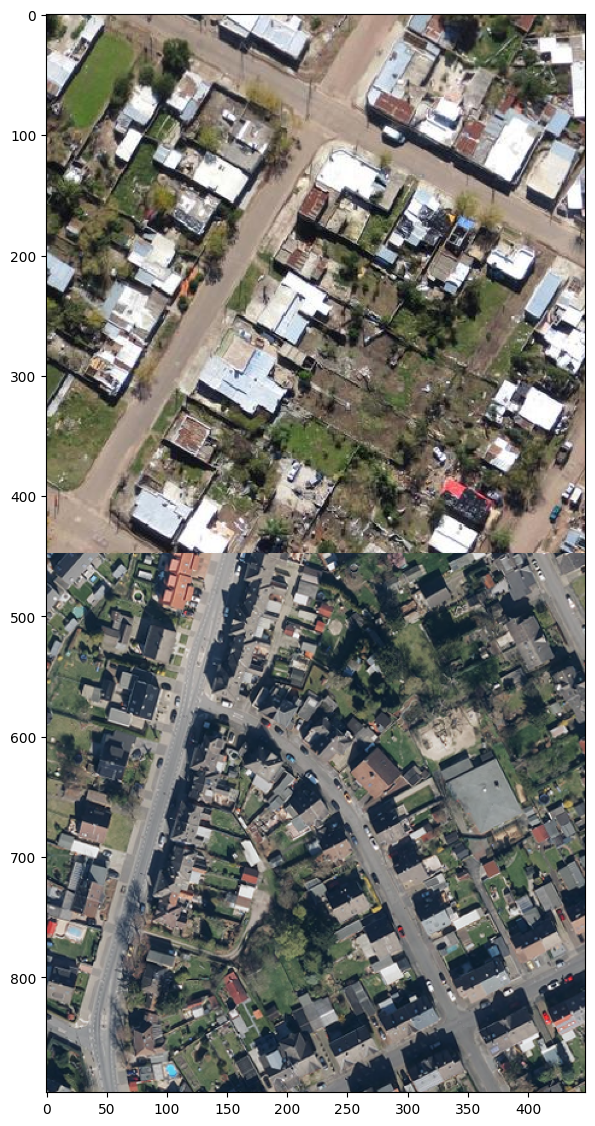

In [16]:
torch_display( train_items[0], False, True  )

In [17]:
train_items[5].shape

torch.Size([896, 448])

In [18]:
ori_label_ = train_items[5].unsqueeze(0)

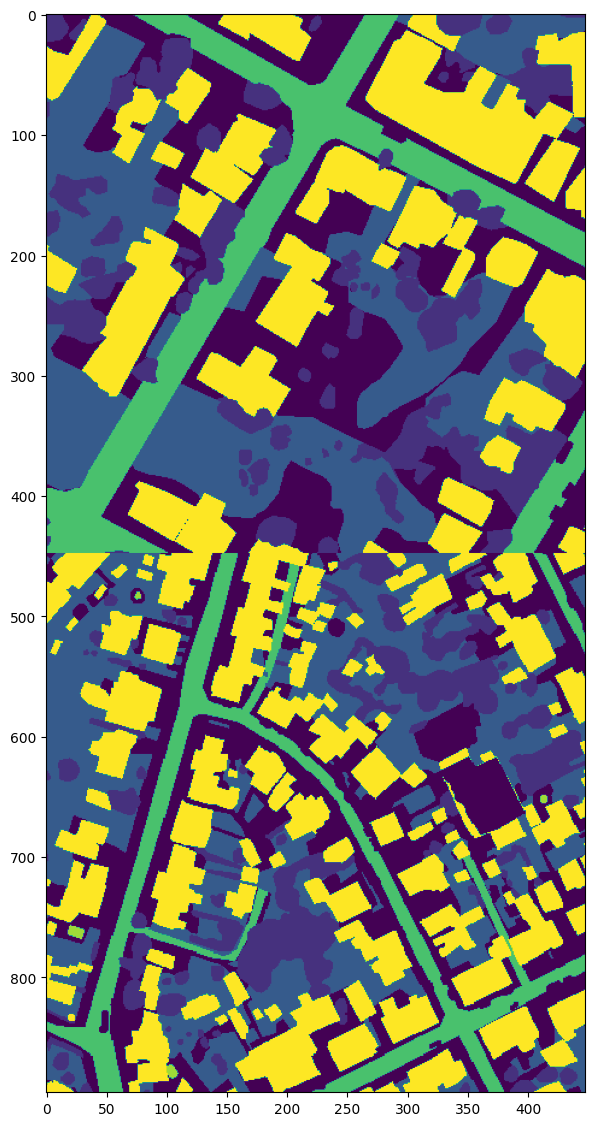

In [19]:
torch_display( ori_label_, False, False )

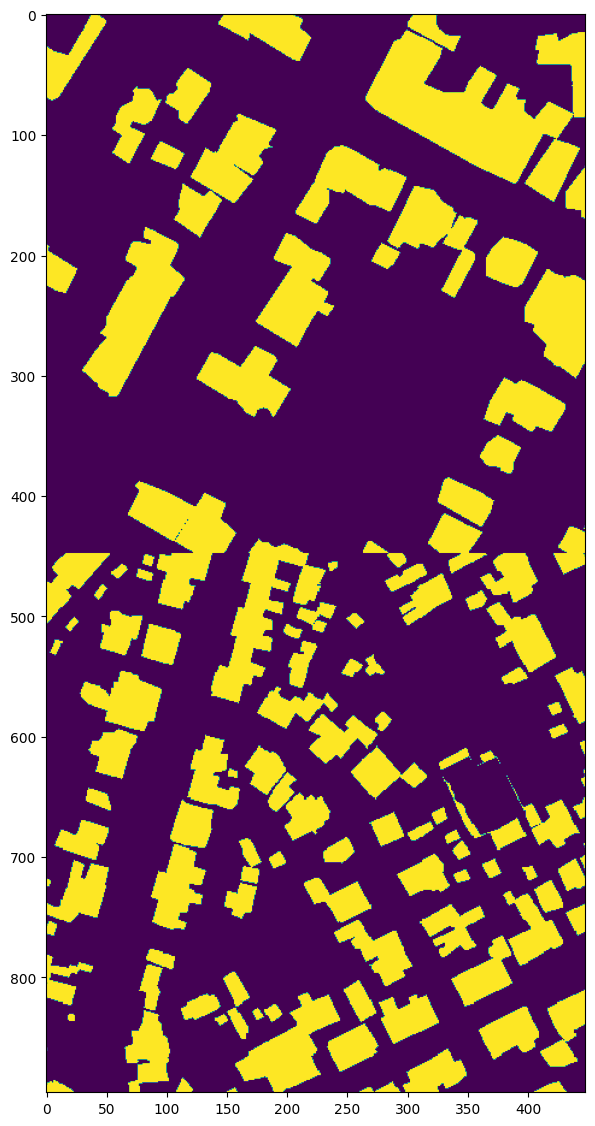

In [20]:
'''
# ***Base classes***
1: 'tree',
2: 'rangeland',
3: 'bareland',
4: 'agric land type 1',
5: 'road type 1',
6: 'sea, lake, & pond',
7: 'building type 1'
'''

tree_label_ = (ori_label_ == 7)
tree_label_ = tree_label_.permute(1,2,0)
t1 = np.asarray(tree_label_)
t1 = np.squeeze(t1)
plt.figure(figsize=(14,14))
plt.imshow(t1)

In [21]:
import os
train_imgs = sorted(os.listdir("/home/eric/data/trainset/images"))
train_labels = sorted(os.listdir("/home/eric/data/trainset/labels"))  
val_imgs = sorted(os.listdir("/home/eric/data/new_data/valset/images"))
val_labels = sorted(os.listdir("/home/eric/data/new_data/valset/labels"))
test_imgs = sorted(os.listdir("/home/eric/data/new_data/testset/images"))
test_labels = sorted(os.listdir("/home/eric/data/new_data/testset/labels"))

In [22]:
'''
Both `valset` and `testset`  have 20 image-label pair examples, 5-set examples for each of the 4 novel classes in the support set.
The `valset` and the `testset` contain an additional 30 images and 80 images, respectively, 
in the query set, which are to be predicted using the 20 labelled images in their support set
'''

len(train_imgs), len(train_labels), [i for i in train_labels if i in train_imgs].__len__()

(258, 258, 258)

In [23]:
'''
20 image-label pair
30 additional  
'''

len(val_imgs), len(val_labels), len([i for i in val_labels if i in val_imgs])

(50, 20, 20)

In [24]:
'''
20 image-label pair
80 additional  
'''
len(test_imgs), len(test_labels), len([i for i in test_labels if i in test_imgs])

(100, 20, 20)

In [25]:
# validation set 
'''
- `images` folder: 50 images of size 1024x1024 with a GSD (Ground Sampling Distance) of 0.6-1m.
- `labels` folder: 20 labels of the ``support set`` images in the `images` folder. The labels for 
    the 30 ``query set`` images in the `images` folder are withheld.

'''

val_dataset = OEMDataset(
    root = train_args['val_dataset_dir'], 
    max_classes = train_args['n_classes'],
    mean = train_args['image_mean'],
    std = train_args['image_std'],
    mask_ratio = train_args['mask_ratio'],
    resize = (448, 448),
    is_train = False,
)

Skipping label path /home/eric/data/valset/labels/kyoto_50.tif as it does not exist
Skipping label path /home/eric/data/valset/labels/accra_29.tif as it does not exist
Skipping label path /home/eric/data/valset/labels/rotterdam_22.tif as it does not exist
Skipping label path /home/eric/data/valset/labels/ngaoundere_36.tif as it does not exist
Skipping label path /home/eric/data/valset/labels/svaneti_13.tif as it does not exist
Skipping label path /home/eric/data/valset/labels/rotterdam_21.tif as it does not exist
Skipping label path /home/eric/data/valset/labels/lohur_7.tif as it does not exist
Skipping label path /home/eric/data/valset/labels/al_qurnah_62.tif as it does not exist
Skipping label path /home/eric/data/valset/labels/kyoto_18.tif as it does not exist
Skipping label path /home/eric/data/valset/labels/kyoto_65.tif as it does not exist
Skipping label path /home/eric/data/valset/labels/lohur_29.tif as it does not exist
Skipping label path /home/eric/data/valset/labels/bielefel

In [1]:
# inference results 
infer_result = "/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/OEM-Fewshot-Challenge/results/preds"

In [33]:
from glob import glob
png_ls = glob(infer_result + "/*")

In [34]:
png_ls[0]

'/home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/OEM-Fewshot-Challenge/results/preds/shanghai_26.png'

In [35]:
from PIL import Image
img_ = Image.open(png_ls[0])

filename /home/eric/srcs/FewShotSeg_Lab/FewShotVision_Lab/OEM-Fewshot-Challenge/results/preds/shanghai_26.png


In [36]:
img_ = np.asarray(img_)

In [41]:
unique_class = np.unique(img_)

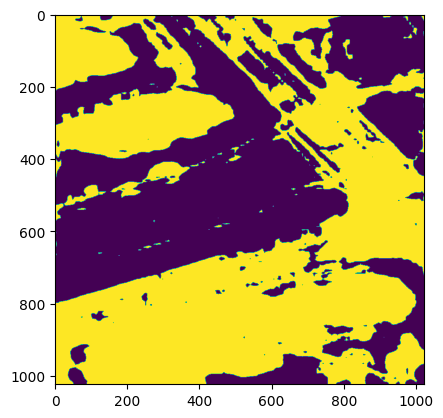

In [44]:
a_ = img_ == unique_class[0]
plt.imshow(a_)